In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

# example path
path = "/content/drive/MyDrive/AI_Waste_Project/synthetic_waste_dataset_1000.csv"
df = pd.read_csv(path)

print("Dataset loaded successfully!")
print(df.head())



Mounted at /content/drive
Dataset loaded successfully!
  Item_ID               Item_Name Material_Type      Sub_Category  \
0   W0920  Synthetic Fabric Sheet       Textile  Synthetic Fabric   
1   W0526     Cardboard Container         Paper         Cardboard   
2   W0568        Office Paper Can         Paper      Office Paper   
3   W0657        Food Waste Sheet       Organic        Food Waste   
4   W0927       Cotton Fabric Box       Textile     Cotton Fabric   

                                         Description        Color  \
0  synthetic fabric sheet usually found in commer...  Transparent   
1  cardboard container usually found in household...        Black   
2  office paper can usually found in industrial w...  Transparent   
3  food waste sheet usually found in commercial w...       Silver   
4  cotton fabric box usually found in industrial ...        Brown   

  Texture_Type Size_Category  Weight_g     Condition  ...  \
0        Matte         Small    445.62         Clean  


🧠 Training Model: Logistic Regression
✅ Accuracy: 0.176
Classification Report:
              precision    recall  f1-score   support

     E-Waste       0.05      0.04      0.04        28
       Glass       0.23      0.39      0.29        28
       Metal       0.12      0.14      0.13        28
     Organic       0.25      0.24      0.25        29
       Paper       0.21      0.10      0.14        29
     Plastic       0.21      0.21      0.21        28
     Textile       0.12      0.10      0.11        29

    accuracy                           0.18       199
   macro avg       0.17      0.18      0.17       199
weighted avg       0.17      0.18      0.17       199



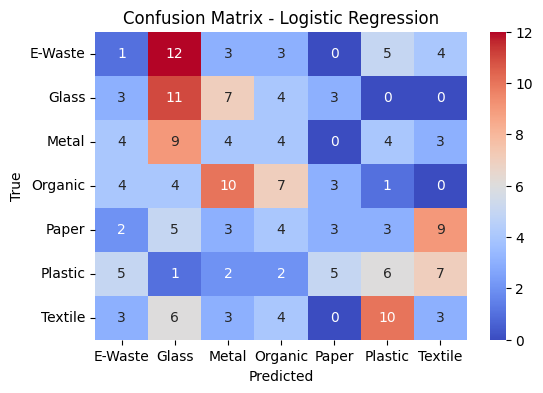


🧠 Training Model: Random Forest
✅ Accuracy: 0.794
Classification Report:
              precision    recall  f1-score   support

     E-Waste       0.83      0.89      0.86        28
       Glass       0.62      0.86      0.72        28
       Metal       0.81      0.61      0.69        28
     Organic       0.88      1.00      0.94        29
       Paper       0.75      0.52      0.61        29
     Plastic       0.80      0.86      0.83        28
     Textile       0.92      0.83      0.87        29

    accuracy                           0.79       199
   macro avg       0.80      0.79      0.79       199
weighted avg       0.80      0.79      0.79       199



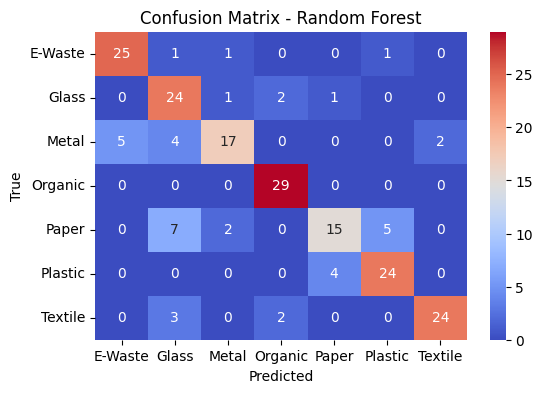


🧠 Training Model: XGBoost
✅ Accuracy: 1.000
Classification Report:
              precision    recall  f1-score   support

     E-Waste       1.00      1.00      1.00        28
       Glass       1.00      1.00      1.00        28
       Metal       1.00      1.00      1.00        28
     Organic       1.00      1.00      1.00        29
       Paper       1.00      1.00      1.00        29
     Plastic       1.00      1.00      1.00        28
     Textile       1.00      1.00      1.00        29

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



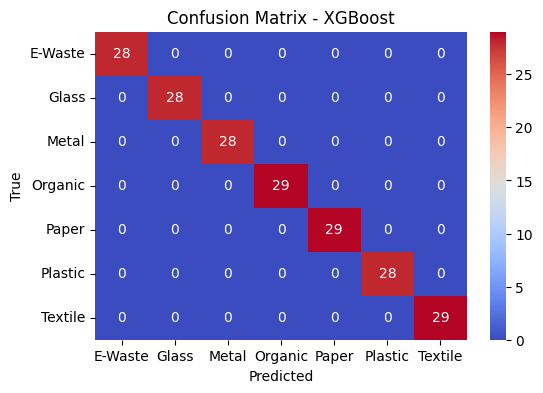


🧠 Training Model: SVM (RBF Kernel)
✅ Accuracy: 0.281
Classification Report:
              precision    recall  f1-score   support

     E-Waste       0.24      0.21      0.23        28
       Glass       0.25      0.43      0.32        28
       Metal       0.17      0.11      0.13        28
     Organic       0.42      0.48      0.45        29
       Paper       0.27      0.21      0.24        29
     Plastic       0.32      0.43      0.37        28
     Textile       0.19      0.10      0.13        29

    accuracy                           0.28       199
   macro avg       0.27      0.28      0.27       199
weighted avg       0.27      0.28      0.27       199



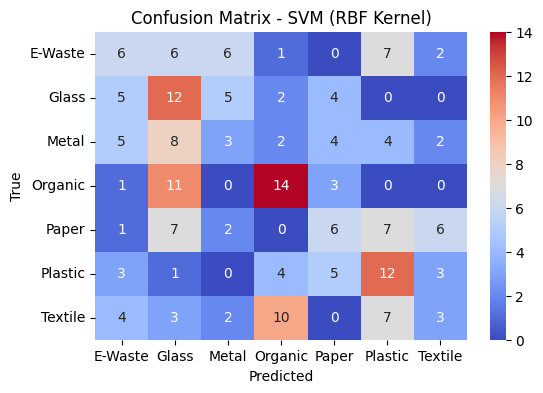


🧠 Training Model: Neural Network (MLP)
✅ Accuracy: 0.357
Classification Report:
              precision    recall  f1-score   support

     E-Waste       0.37      0.36      0.36        28
       Glass       0.24      0.29      0.26        28
       Metal       0.21      0.21      0.21        28
     Organic       0.51      0.62      0.56        29
       Paper       0.37      0.38      0.37        29
     Plastic       0.48      0.39      0.43        28
     Textile       0.32      0.24      0.27        29

    accuracy                           0.36       199
   macro avg       0.36      0.36      0.35       199
weighted avg       0.36      0.36      0.35       199



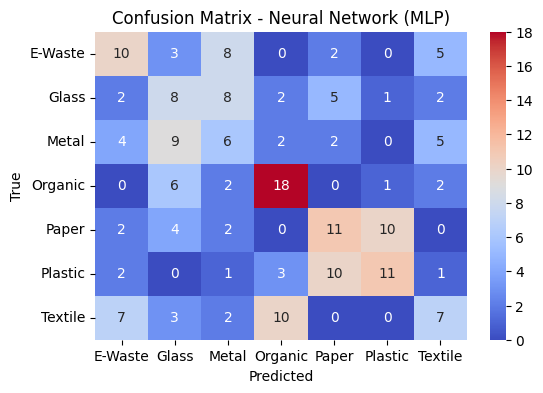


📊 MODEL PERFORMANCE COMPARISON
Logistic Regression: 0.176
Random Forest: 0.794
XGBoost: 1.000
SVM (RBF Kernel): 0.281
Neural Network (MLP): 0.357


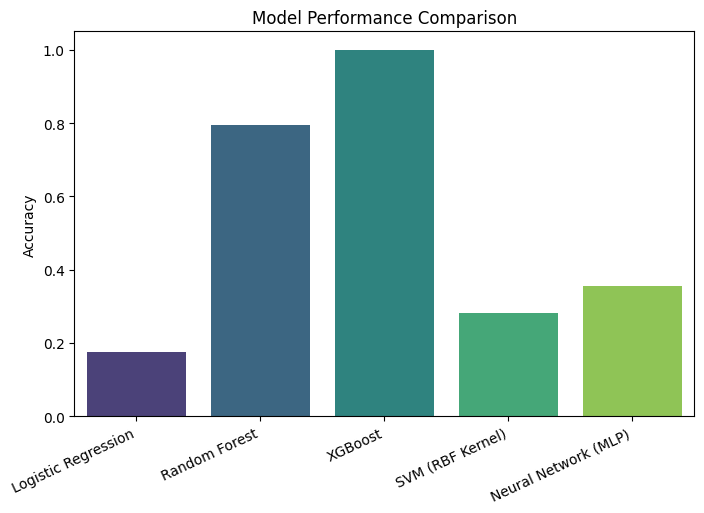


🎯 Training and Comparison Complete!


In [ ]:
# ============================================================
# AI-Powered Waste Segregation — Multiple Model Comparison
# ============================================================

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# -------------------------------
# Step 1: Load Dataset
# -------------------------------
df = pd.read_csv("synthetic_waste_dataset_1000.csv")

# Drop unused columns
drop_cols = ["Item_ID", "Item_Name", "Description", "Remarks", "Image_File_Path", "Label_Confidence"]
df = df.drop(columns=drop_cols)

# Define target and features
X = df.drop("Material_Type", axis=1)
y = df["Material_Type"]

# Encode categorical variables
categorical_cols = X.select_dtypes(include=["object", "bool"]).columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# Step 2: Define Models
# -------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=250,
        learning_rate=0.1,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ),
    "SVM (RBF Kernel)": SVC(kernel="rbf", C=2, gamma="auto", probability=True, random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
}

# -------------------------------
# Step 3: Train & Evaluate Models
# -------------------------------
results = {}

for name, model in models.items():
    print(f"\n==============================")
    print(f"🧠 Training Model: {name}")
    print(f"==============================")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"✅ Accuracy: {acc:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# -------------------------------
# Step 4: Compare All Models
# -------------------------------
print("\n==============================")
print("📊 MODEL PERFORMANCE COMPARISON")
print("==============================")
for name, acc in results.items():
    print(f"{name}: {acc:.3f}")

# Bar Chart for Visual Comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.xticks(rotation=25, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

print("\n🎯 Training and Comparison Complete!")


# ** ON IMAGE DATASET **

In [ ]:
ZIP_PATH = '/content/drive/MyDrive/GARBAGE CLASSIFICATION 3.v2-gc1.tensorflow.zip'  # <-- edit if different
EXTRACT_TO = '/content/garbage_dataset'
IMG_SIZE = (224, 224)     # image size used by most transfer models
BATCH_SIZE = 32
EPOCHS = 5                # increase to 15-30 for full runs
SAVE_DIR = '/content/drive/MyDrive/AI_Waste_Project'  # where models & results will be saved


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, zipfile, time, math
os.makedirs(SAVE_DIR, exist_ok=True)


Mounted at /content/drive


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset path
dataset_root = "/content/drive/MyDrive/AI_Waste_Project/GARBAGE CLASSIFICATION 3.v2-gc1.tensorflow"

# Define train, validation, and test paths
import os
train_dir = os.path.join(dataset_root, "train")
val_dir   = os.path.join(dataset_root, "valid")
test_dir  = os.path.join(dataset_root, "test")

# Verify that folders exist
print("Train Folder Exists:", os.path.exists(train_dir))
print("Validation Folder Exists:", os.path.exists(val_dir))
print("Test Folder Exists:", os.path.exists(test_dir))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Folder Exists: True
Validation Folder Exists: True
Test Folder Exists: True


In [ ]:
# =========================================================
# STEP 1: IMPORTS & DATA PREPARATION
# =========================================================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import (
    VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121, EfficientNetB0
)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
)
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os

# Dataset paths
train_dir = "/content/drive/MyDrive/AI_Waste_Project/GARBAGE CLASSIFICATION 3.v2-gc1.tensorflow/train"
val_dir   = "/content/drive/MyDrive/AI_Waste_Project/GARBAGE CLASSIFICATION 3.v2-gc1.tensorflow/valid"
test_dir  = "/content/drive/MyDrive/AI_Waste_Project/GARBAGE CLASSIFICATION 3.v2-gc1.tensorflow/test"

# =========================================================
# STEP 2: DATA AUGMENTATION
# =========================================================

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical')

num_classes = len(train_data.class_indices)
print(f"\nDetected {num_classes} classes: {list(train_data.class_indices.keys())}")

# =========================================================
# STEP 3: DEFINE MODEL BUILDING FUNCTION
# =========================================================

def build_custom_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        MaxPooling2D(2,2),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


def build_transfer_model(base_model):
    base_model.trainable = False
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.4)(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model

# =========================================================
# STEP 4: DEFINE MODELS
# =========================================================

models = {
    "Custom_CNN": build_custom_cnn(),
    "VGG16": build_transfer_model(VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))),
    "ResNet50": build_transfer_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))),
    "InceptionV3": build_transfer_model(InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))),
    "MobileNetV2": build_transfer_model(MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))),
    "DenseNet121": build_transfer_model(DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))),
    "EfficientNetB0": build_transfer_model(EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))),
}

# =========================================================
# STEP 5: TRAIN MODELS
# =========================================================

histories = {}
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=5,   # You can increase epochs for better performance
        verbose=1
    )

    test_loss, test_acc = model.evaluate(test_data)
    print(f"{name} Test Accuracy: {test_acc*100:.2f}%")

    histories[name] = history
    results[name] = test_acc

# =========================================================
# STEP 6: COMPARE RESULTS
# =========================================================

plt.figure(figsize=(10,5))
plt.bar(results.keys(), [v*100 for v in results.values()], color='teal')
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison — Garbage Classification")
plt.xticks(rotation=45)
plt.show()

# =========================================================
# STEP 7: OPTIONAL - SAVE MODELS
# =========================================================

for name, model in models.items():
    model.save(f"/content/drive/MyDrive/AI_Waste_Project/{name}_model.h5")
print("✅ All models saved successfully!")


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.

Detected 0 classes: []


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

🔹 Training Custom_CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

In [ ]:
import os

base_path = "/content/drive/MyDrive/AI_Waste_Project/GARBAGE CLASSIFICATION 3.v2-gc1.tensorflow"

for folder in ["train", "valid", "test"]:
    path = os.path.join(base_path, folder)
    print(f"\n📂 {folder.upper()} FOLDER CHECK:")
    if os.path.exists(path):
        for subfolder in os.listdir(path):
            sub_path = os.path.join(path, subfolder)
            if os.path.isdir(sub_path):
                count = len([f for f in os.listdir(sub_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
                print(f"  {subfolder}: {count} images")
    else:
        print(f"❌ {folder} folder missing!")



📂 TRAIN FOLDER CHECK:

📂 VALID FOLDER CHECK:

📂 TEST FOLDER CHECK:


In [ ]:
import os
import shutil
from tqdm import tqdm

# ✅ Paths
base_dir = '/content/drive/MyDrive/AI_Waste_Project/GARBAGE CLASSIFICATION 3.v2-gc1.tensorflow'
sorted_dir = '/content/drive/MyDrive/AI_Waste_Project/GARBAGE_CLASSIFICATION_SORTED'

# Classes you want
classes = ['plastic', 'metal', 'glass', 'paper', 'cardboard', 'trash', 'other']

# ✅ Step 1: Create target folder structure
for split in ['train', 'test', 'valid']:
    for cls in classes:
        os.makedirs(os.path.join(sorted_dir, split, cls), exist_ok=True)

print("✅ Folder structure created successfully!")

# ✅ Step 2: Organize files by name prefix
for split in ['train', 'test', 'valid']:
    split_path = os.path.join(base_dir, split)
    if not os.path.exists(split_path):
        print(f"⚠️ {split_path} not found, skipping...")
        continue

    for file in tqdm(os.listdir(split_path), desc=f"Sorting {split} images"):
        src = os.path.join(split_path, file)

        # skip non-image files
        if not os.path.isfile(src) or not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        # detect class from filename
        label = file.split('_')[0].lower()
        if label not in classes:
            label = 'other'  # fallback if unknown

        dest = os.path.join(sorted_dir, split, label, file)
        shutil.copy(src, dest)

print("✅ Sorting complete! Images organized into class folders.")

# ✅ Step 3: Zip the final dataset
import zipfile

zip_path = '/content/drive/MyDrive/AI_Waste_Project/GARBAGE_CLASSIFICATION_SORTED.zip'
print("📦 Creating ZIP file...")
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(sorted_dir):
        for file in files:
            filepath = os.path.join(root, file)
            arcname = os.path.relpath(filepath, sorted_dir)
            zipf.write(filepath, arcname)

print(f"✅ Sorted dataset zipped at: {zip_path}")


✅ Folder structure created successfully!


Sorting valid images:   3%|▎         | 54/2099 [00:10<06:24,  5.32it/s]


KeyboardInterrupt: 